<a href="https://colab.research.google.com/github/SharatGupta/DSML-Projects/blob/main/Scaler%20-%20Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

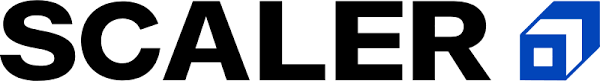

Scaler is an online tech-versity offering intensive computer science & Data Science courses through live classes delivered by tech leaders and subject matter experts. The meticulously structured program enhances the skills of software professionals by offering a modern curriculum with exposure to the latest technologies. It is a product by InterviewBit

# **Business Problem**

* Working as a data scientist with the analytics vertical of Scaler, focused on profiling the best companies and job positions to work for from the Scaler database.
* You are provided with the information for a segment of learners and tasked to cluster them on the basis of their job profile, company, and other features. Ideally, these clusters should have similar characteristics


# **Desired Outcome of Analysis**


* Define Problem Statement and perform Exploratory Data Analysis
* Definition of problem (as per given problem statement with additional views)
* Observations on shape of data, data types of all the attributes, conversion of categorical attributes to 'category' (If required) , missing value detection, statistical summary.
* Univariate Analysis (distribution plots of all the continuous variable(s) barplots/countplots of all the categorical variables)
* Bivariate Analysis (Relationships between important variables such as workday and count, season and count, weather and count.
* Illustrate the insights based on EDA
* Comments on range of attributes, outliers of various attributes
* Comments on the distribution of the variables and relationship between them
* Comments for each univariate and bivariate plots
* Data Pre-processing:
** Mean/ KNN Imputation
** Regex for cleaning company names
** Standardization & Encoding
* Manual Clustering:
** Creating Designation Flag & Insights
** Creating Class Flag & Insights
** Creating Tier Flag & Insights
* Unsupervised learning:
** Checking clustering tendency, Elbow method & K- means clustering
** Hierarchical Clustering
* Actionable Insights & Recommendations

# **Loading Modules and Data**

In [1]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import re

from sklearn.impute import KNNImputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as sch

from sklearn.model_selection import train_test_split


In [2]:
data = pd.read_csv("https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/002/856/original/scaler_clustering.csv")

## Data Dictionary

1. Unnamed 0: The index of the dataset.
2. Email_hash: An anonymized identifier representing the email of the learner.
3. Company_hash: An anonymized identifier indicating the current employer of the
learner.
4. orgyear: Represents the year the learner began employment at the current
company.
5. CTC: Current Compensation to the Company (CTC) of the learner.
6. Job_position: Represents the job profile or role of the learner within their
company.
7. CTC_updated_year: The year in which the learner's CTC was most recently
updated. This could be due to yearly increments, promotions, or other factors.

In [3]:
data.shape

(205843, 7)

In [4]:
data.head(10)

,Unnamed: 0,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year
0,0,atrgxnnt xzaxv,6de0a4417d18ab14334c3f43397fc13b30c35149d70c05...,2016.0,1100000,Other,2020.0
1,1,qtrxvzwt xzegwgbb rxbxnta,b0aaf1ac138b53cb6e039ba2c3d6604a250d02d5145c10...,2018.0,449999,FullStack Engineer,2019.0
2,2,ojzwnvwnxw vx,4860c670bcd48fb96c02a4b0ae3608ae6fdd98176112e9...,2015.0,2000000,Backend Engineer,2020.0
3,3,ngpgutaxv,effdede7a2e7c2af664c8a31d9346385016128d66bbc58...,2017.0,700000,Backend Engineer,2019.0
4,4,qxen sqghu,6ff54e709262f55cb999a1c1db8436cb2055d8f79ab520...,2017.0,1400000,FullStack Engineer,2019.0
5,5,yvuuxrj hzbvqqxta bvqptnxzs ucn rna,18f2c4aa2ac9dd3ae8ff74f32d30413f5165565b90d8f2...,2018.0,700000,FullStack Engineer,2020.0
6,6,lubgqsvz wyvot wg,9bf128ae3f4ea26c7a38b9cdc58cf2acbb8592100c4128...,2018.0,1500000,FullStack Engineer,2019.0
7,7,vwwtznhqt ntwyzgrgsj,756d35a7f6bb8ffeaffc8fcca9ddbb78e7450fa0de2be0...,2019.0,400000,Backend Engineer,2019.0
8,8,utqoxontzn ojontbo,e245da546bf50eba09cb7c9976926bd56557d1ac9a17fb...,2020.0,450000,NaN,2019.0
9,9,xrbhd,b2dc928f4c22a9860b4a427efb8ab761e1ce0015fba1a5...,2019.0,360000,NaN,2019.0


In [5]:
data.nunique()

Unnamed: 0          205843
company_hash         37299
email_hash          153443
orgyear                 77
ctc                   3360
job_position          1016
ctc_updated_year         7
dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205843 entries, 0 to 205842
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        205843 non-null  int64  
 1   company_hash      205799 non-null  object 
 2   email_hash        205843 non-null  object 
 3   orgyear           205757 non-null  float64
 4   ctc               205843 non-null  int64  
 5   job_position      153279 non-null  object 
 6   ctc_updated_year  205843 non-null  float64
dtypes: float64(2), int64(2), object(3)
memory usage: 11.0+ MB


* There are 205843 Records of Data
* email_hash refers to each individual Learner--> 153443 Individual Details
* company_hash refers to Each Individual Compnay --> there are 37299 Companies
* 1017 Different job_position avaiable

In [7]:
data[data.email_hash == data.email_hash[11]]

,Unnamed: 0,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year
11,11,ngdor ntwy,72c2171a022115d475c8faac306912a4c95f6dd7fdd320...,2016.0,600000,iOS Engineer,2021.0
19283,19295,ngdor ntwy,72c2171a022115d475c8faac306912a4c95f6dd7fdd320...,2016.0,600000,NaN,2021.0
144109,144648,ngdor ntwy,72c2171a022115d475c8faac306912a4c95f6dd7fdd320...,2016.0,330000,iOS Engineer,2019.0


* Same learner has multiple rows...we will merge all the Rows after extracting information frmom individual rows

# **Data Overview & Cleaning**

## Dropping Irrelevant columns

In [8]:
data.columns

Index(['Unnamed: 0', 'company_hash', 'email_hash', 'orgyear', 'ctc',
       'job_position', 'ctc_updated_year'],
      dtype='object')

* "Unnamed" 0"  Feature is just an index , so No value as a
feature
* Similarily "email_hash" is just a unique Identifier of employee...not needed for clustering
* So we will drop these 2 feature

In [9]:
data.drop(["Unnamed: 0","email_hash"], axis = 1, inplace = True)

In [10]:
data.shape

(205843, 5)

## Duplicate Values & Their Treatment

In [11]:
data.loc[data.duplicated()]

,company_hash,orgyear,ctc,job_position,ctc_updated_year
584,fxuqg rxbxnta,2019.0,350000,NaN,2020.0
796,nvnv wgzohrnvzwj otqcxwto,2019.0,340000,NaN,2020.0
882,wgszxkvzn,2020.0,350000,NaN,2020.0
899,nvnv wgzohrnvzwj otqcxwto,2020.0,700000,NaN,2020.0
1040,nvnv wgzohrnvzwj otqcxwto,2020.0,340000,NaN,2020.0
...,...,...,...,...,...
205800,zgn vuurxwvmrt,2021.0,350000,NaN,2021.0
205822,zggz uqgahwno,2013.0,2300000,NaN,2020.0
205829,yomw,2019.0,700000,NaN,2019.0
205830,zgn vuurxwvmrt,2019.0,700000,NaN,2019.0


* Duplicate rows are present, lets drop them

In [12]:
print(data.shape)
print(data.drop_duplicates().shape)
data.drop_duplicates(inplace=True)

(205843, 5)
(188372, 5)


## Data Cleaning

In [13]:
import re
def remove_special (string):
    new_string=re.sub('[^A-Za-z ]+','', string)
    return new_string

In [14]:
#what happens here
mystring='\tAirtel\\\\&&**()90 X Labs'
re.sub('[^A-Za-z0-9 ]+', '', mystring)

'Airtel90 X Labs'

In [15]:
data.job_position=data.job_position.apply(lambda x: remove_special(str(x)))
data.job_position=data.job_position.apply(lambda x: x.lower())
data.job_position=data.job_position.apply(lambda x: x.strip())
data.job_position

0                      other
1         fullstack engineer
2           backend engineer
3           backend engineer
4         fullstack engineer
                 ...        
205838                   nan
205839                   nan
205840                   nan
205841                   nan
205842                   nan
Name: job_position, Length: 188372, dtype: object

In [16]:
data['company_hash'].value_counts().sort_index()

company_hash
0                                 2
0000                              1
01 ojztqsj                        2
05mz exzytvrny uqxcvnt rxbxnta    2
1                                 2
                                 ..
zyvzwt wgzohrnxzs tzsxzttqo       1
zz                                2
zzb ztdnstz vacxogqj ucn rna      2
zzgato                            1
zzzbzb                            1
Name: count, Length: 37299, dtype: int64

In [17]:
data.company_hash=data.company_hash.apply(lambda x: remove_special(str(x)))
data.company_hash=data.company_hash.apply(lambda x: x.lower())
data.company_hash=data.company_hash.apply(lambda x: x.strip())
data.company_hash

0                    atrgxnnt xzaxv
1         qtrxvzwt xzegwgbb rxbxnta
2                     ojzwnvwnxw vx
3                         ngpgutaxv
4                        qxen sqghu
                    ...            
205838                    vuurt xzw
205839                    husqvawgb
205840                     vwwgrxnt
205841               zgn vuurxwvmrt
205842               bgqsvz onvzrtj
Name: company_hash, Length: 188372, dtype: object

In [18]:
print(data.shape)
print(data.drop_duplicates().shape)
data.drop_duplicates(inplace=True)

(188372, 5)
(188245, 5)


## Missingvalues & Their Treatment

In [19]:
#removing rows where company or job_position is not available
data=data[ ~((data['company_hash']=='') | (data['job_position']==''))]

In [20]:
data.isna().sum(axis = 0)

company_hash         0
orgyear             86
ctc                  0
job_position         0
ctc_updated_year     0
dtype: int64

* we can impute missing values through KNN Imputation for "orgyear" but many columns are of Object type
* So for the Sake of Problem we will use Median imputation

In [21]:
data.loc[data.orgyear.isna()]["company_hash"].value_counts()

company_hash
vbuygqv ogenfvqt uqxcvnt rxbxnta    2
vwwtznhqt                           2
nvnv wgzohrnvzwj otqcxwto           2
husqvawgb                           2
qvkgquvj                            1
                                   ..
nojo                                1
xuvj ojontbo rna                    1
srgmvr                              1
x wgzohrnxzs                        1
vhngsqxa                            1
Name: count, Length: 82, dtype: int64

In [22]:
data[data["company_hash"]=="vwwtznhqt"]

,company_hash,orgyear,ctc,job_position,ctc_updated_year
460,vwwtznhqt,2016.0,1010000,fullstack engineer,2020.0
477,vwwtznhqt,2012.0,350000,backend engineer,2020.0
568,vwwtznhqt,2018.0,460000,backend engineer,2020.0
582,vwwtznhqt,2017.0,570000,other,2020.0
637,vwwtznhqt,2012.0,78000000,frontend engineer,2020.0
...,...,...,...,...,...
204831,vwwtznhqt,2009.0,820000,nan,2018.0
204974,vwwtznhqt,2011.0,900000,data analyst,2021.0
205149,vwwtznhqt,2018.0,1010000,backend engineer,2021.0
205261,vwwtznhqt,2020.0,390000,frontend engineer,2021.0


In [23]:
company_median_org_year=data.groupby('company_hash')['orgyear'].median()

In [24]:
#Code to impute
#-----------------------------------------------------------------------
import numpy as np
def null_imputation(table_from_which_we_need_to_fill, main_col, null_col):
    if np.isnan(null_col):
        return table_from_which_we_need_to_fill[main_col]
    else:
        return null_col
#-----------------------------------------------------------------------


data['orgyear']=data.apply(lambda x: null_imputation(company_median_org_year,x['company_hash'],x['orgyear'] ), axis=1)

In [25]:
len(data[data['orgyear'].isnull()])

26

* Lets Drop the Remaining Rows

In [26]:
#dropping remaining null values
data=data[~data['orgyear'].isnull()]

## Checking Outliers

In [29]:
#simple understanding
data.orgyear.describe()

count    188126.000000
mean       2014.613995
std          66.472920
min           0.000000
25%        2013.000000
50%        2016.000000
75%        2018.000000
max       20165.000000
Name: orgyear, dtype: float64

<Axes: ylabel='orgyear'>

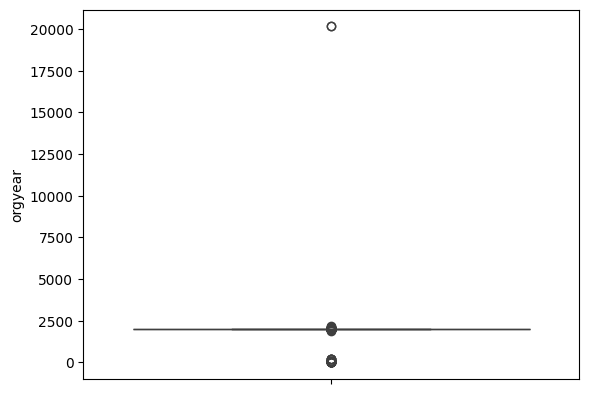

In [28]:
sns.boxplot(y = data["orgyear"])

In [30]:
#removing outliers from orgyear using IQR

q1=data.orgyear.quantile(0.25)
q3=data.orgyear.quantile(0.75)
iqr=q3-q1

data=data.loc[(data.orgyear>=q1-1.5*iqr) & (data.orgyear<=q3+1.5*iqr)]


<Axes: ylabel='orgyear'>

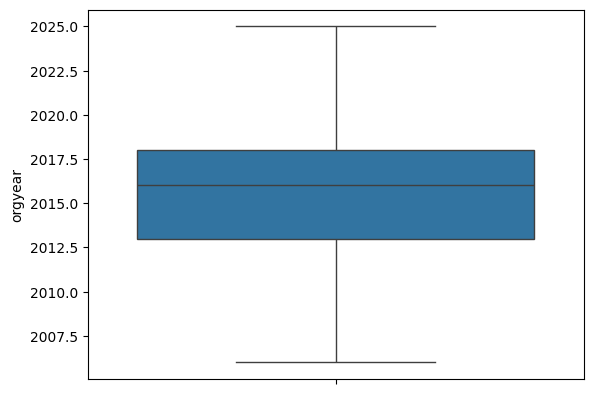

In [32]:
sns.boxplot(y = data["orgyear"])

In [31]:
data.orgyear.describe()

count    180406.000000
mean       2015.421513
std           3.333918
min        2006.000000
25%        2013.000000
50%        2016.000000
75%        2018.000000
max        2025.000000
Name: orgyear, dtype: float64

In [34]:
data.ctc.describe()

count    1.804060e+05
mean     2.323162e+06
std      1.221796e+07
min      2.000000e+00
25%      5.800000e+05
50%      1.000000e+06
75%      1.680000e+06
max      1.000150e+09
Name: ctc, dtype: float64

<Axes: ylabel='ctc'>

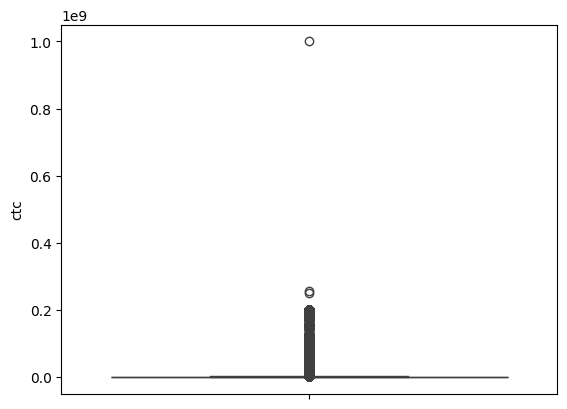

In [33]:
sns.boxplot(y = data["ctc"])

In [35]:
#removing outliers from ctc using IQR

q1=data.ctc.quantile(0.25)
q3=data.ctc.quantile(0.75)
iqr=q3-q1

data=data.loc[(data.ctc>=q1-1.5*iqr) & (data.ctc<=q3+1.5*iqr)]

<Axes: ylabel='ctc'>

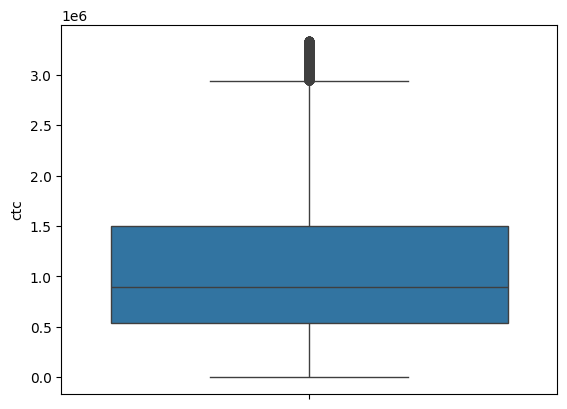

In [36]:
sns.boxplot(y = data["ctc"])

In [37]:
data.ctc.describe()

count    1.689860e+05
mean     1.086971e+06
std      7.268886e+05
min      2.000000e+00
25%      5.400000e+05
50%      9.000000e+05
75%      1.500000e+06
max      3.330000e+06
Name: ctc, dtype: float64

## Final Cleaned Data

In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 168986 entries, 0 to 205842
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   company_hash      168986 non-null  object 
 1   orgyear           168986 non-null  float64
 2   ctc               168986 non-null  int64  
 3   job_position      168986 non-null  object 
 4   ctc_updated_year  168986 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 7.7+ MB


In [39]:
data.describe(include = "all")

,company_hash,orgyear,ctc,job_position,ctc_updated_year
count,168986,168986.000000,1.689860e+05,168986,168986.000000
unique,34008,NaN,NaN,762,NaN
top,nvnv wgzohrnvzwj otqcxwto,NaN,NaN,nan,NaN
freq,4111,NaN,NaN,39859,NaN
mean,NaN,2015.521046,1.086971e+06,NaN,2019.591280
std,NaN,3.262040,7.268886e+05,NaN,1.345727
min,NaN,2006.000000,2.000000e+00,NaN,2015.000000
25%,NaN,2014.000000,5.400000e+05,NaN,2019.000000
50%,NaN,2016.000000,9.000000e+05,NaN,2020.000000
75%,NaN,2018.000000,1.500000e+06,NaN,2021.000000


## Feature Engineering

* Let us create some flag for Quaterly Rating, Monthly Income , Grade by checking if Rating has increased or decreased --> if Increase we will categorize it as "1" representing growth
* Next we will create our Target Variable for each driver ID from last working day--> if it present value will be "1" meaning driver left

### Income

In [ ]:
def func1(x):
  if x["Income_x"] >= x["Income_y"] :
    return 0
  else:
     return 1

In [ ]:
data1["Income"] = data1.apply(func1,axis=1)

In [ ]:
data1[data1.Income == 1].head()

,Driver_ID,Age,Gender,City,Education_Level,Income_x,Dateofjoining,LastWorkingDate,Joining Designation,Grade_x,Total Business Value,Quarterly Rating_x,Income_y,Grade_y,Quarterly Rating_y,Income
18,26.0,41.0,0.0,C14,2.0,121529.0,2018-05-07,NaT,1.0,3,2.911162e+06,4,132577.0,4,2,1
40,54.0,33.0,0.0,C29,1.0,117993.0,2019-07-11,NaT,4.0,4,1.879072e+06,2,127826.0,5,1,1
46,60.0,46.0,1.0,C20,0.0,82126.0,2016-09-17,NaT,1.0,3,2.051063e+06,4,89592.0,4,2,1
80,98.0,24.0,0.0,C16,0.0,57977.0,2019-08-15,2020-12-25,2.0,2,1.259732e+06,3,63774.0,3,2,1
230,275.0,39.0,0.0,C20,0.0,89124.0,2016-05-02,NaT,1.0,3,1.404075e+06,3,97226.0,4,3,1


* We can see that if Income Increase --> it has be denoted as "1" in Income Column

### Quarterly Rating

In [ ]:
def func1(x):
  if x["Quarterly Rating_x"] >= x["Quarterly Rating_y"] :
    return 0
  else:
     return 1

In [ ]:
data1["Quarterly Rating"] = data1.apply(func1,axis=1)

In [ ]:
data1[data1["Quarterly Rating"]== 1]

,Driver_ID,Age,Gender,City,Education_Level,Income_x,Dateofjoining,LastWorkingDate,Joining Designation,Grade_x,Total Business Value,Quarterly Rating_x,Income_y,Grade_y,Quarterly Rating_y,Income,Quarterly Rating
4,6.0,31.0,1.0,C11,1.0,78728.0,2020-07-31,NaT,3.0,3,2.530000e+05,1,78728.0,3,2,0,1
17,25.0,29.0,0.0,C24,1.0,102077.0,2017-10-30,NaT,1.0,3,1.514630e+06,3,102077.0,3,4,0,1
21,31.0,32.0,1.0,C28,2.0,65189.0,2020-07-04,NaT,3.0,3,1.584900e+05,1,65189.0,3,2,0,1
29,41.0,33.0,0.0,C29,2.0,92372.0,2019-07-04,NaT,4.0,4,1.208662e+06,1,92372.0,4,2,0,1
33,45.0,35.0,0.0,C8,2.0,77544.0,2020-05-29,NaT,3.0,3,7.467629e+05,1,77544.0,3,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2352,2754.0,28.0,0.0,C6,2.0,62462.0,2019-06-08,NaT,1.0,1,3.018905e+05,1,62462.0,1,2,0,1
2358,2761.0,28.0,0.0,C20,2.0,131805.0,2020-07-17,NaT,3.0,3,5.035733e+05,1,131805.0,3,3,0,1
2374,2781.0,25.0,0.0,C23,2.0,46952.0,2020-02-17,NaT,2.0,2,7.848518e+05,1,46952.0,2,4,0,1
2376,2784.0,33.0,0.0,C24,0.0,82815.0,2015-10-15,NaT,2.0,3,9.062008e+05,3,82815.0,3,4,0,1


* We can see that if Quaterly Rating Increase --> it has be denoted as "1" in Quaterly Rating Column

### Grade

In [ ]:
def func1(x):
  if x["Grade_x"] >= x["Grade_y"] :
    return 0
  else:
     return 1

In [ ]:
data1["Grade"] = data1.apply(func1,axis=1)

In [ ]:
data1[data1["Grade"]== 1]

,Driver_ID,Age,Gender,City,Education_Level,Income_x,Dateofjoining,LastWorkingDate,Joining Designation,Grade_x,Total Business Value,Quarterly Rating_x,Income_y,Grade_y,Quarterly Rating_y,Income,Quarterly Rating,Grade
18,26.0,41.0,0.0,C14,2.0,121529.0,2018-05-07,NaT,1.0,3,2.911162e+06,4,132577.0,4,2,1,0,1
40,54.0,33.0,0.0,C29,1.0,117993.0,2019-07-11,NaT,4.0,4,1.879072e+06,2,127826.0,5,1,1,0,1
46,60.0,46.0,1.0,C20,0.0,82126.0,2016-09-17,NaT,1.0,3,2.051063e+06,4,89592.0,4,2,1,0,1
80,98.0,24.0,0.0,C16,0.0,57977.0,2019-08-15,2020-12-25,2.0,2,1.259732e+06,3,63774.0,3,2,1,0,1
230,275.0,39.0,0.0,C20,0.0,89124.0,2016-05-02,NaT,1.0,3,1.404075e+06,3,97226.0,4,3,1,0,1
256,307.0,37.0,0.0,C26,0.0,80856.0,2018-10-05,2020-10-26,2.0,3,2.583608e+06,4,88207.0,4,1,1,0,1
267,320.0,27.0,1.0,C20,0.0,56813.0,2018-07-13,NaT,1.0,1,1.256403e+06,4,63126.0,2,4,1,0,1
312,368.0,43.0,0.0,C23,1.0,46719.0,2018-09-18,NaT,1.0,1,1.286220e+06,4,51911.0,2,4,1,0,1
368,434.0,28.0,1.0,C6,2.0,80469.0,2017-08-11,NaT,1.0,2,2.153367e+06,4,88515.0,3,4,1,0,1
460,537.0,34.0,1.0,C29,1.0,76868.0,2019-12-06,NaT,2.0,2,1.798186e+06,1,84554.0,3,4,1,1,1


* We can see that if Grade Increase --> it has be denoted as "1" in Grade Column

### Churn

In [ ]:
data1["Churn"] = data1["LastWorkingDate"].notnull()

In [ ]:
data1[data1["Churn"]== True]

,Driver_ID,Age,Gender,City,Education_Level,Income_x,Dateofjoining,LastWorkingDate,Joining Designation,Grade_x,Total Business Value,Quarterly Rating_x,Income_y,Grade_y,Quarterly Rating_y,Income,Quarterly Rating,Grade,Churn
0,1.0,28.0,0.0,C23,2.0,57387.0,2018-12-24,2019-03-11,1.0,1,571860.000000,2,57387.0,1,2,0,0,0,True
2,4.0,43.0,0.0,C13,2.0,65603.0,2019-12-07,2020-04-27,2.0,2,70000.000000,1,65603.0,2,1,0,0,0,True
3,5.0,29.0,0.0,C9,0.0,46368.0,2019-01-09,2019-03-07,1.0,1,40120.000000,1,46368.0,1,1,0,0,0,True
5,8.0,34.0,0.0,C2,0.0,70656.0,2020-09-19,2020-11-15,3.0,3,0.000000,1,70656.0,3,1,0,0,0,True
7,12.0,35.0,0.0,C23,2.0,28116.0,2019-06-29,2019-12-21,1.0,1,434530.000000,4,28116.0,1,1,0,0,0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2373,2779.0,28.0,0.0,C26,0.0,95133.0,2020-01-26,2020-02-14,3.0,3,0.000000,1,95133.0,3,1,0,0,0,True
2375,2782.0,26.0,0.0,C19,1.0,29582.0,2019-05-16,2019-08-16,1.0,1,0.000000,1,29582.0,1,1,0,0,0,True
2377,2785.0,34.0,1.0,C9,0.0,12105.0,2020-08-28,2020-10-28,1.0,1,0.000000,1,12105.0,1,1,0,0,0,True
2378,2786.0,44.0,0.0,C19,0.0,35370.0,2018-07-31,2019-09-22,2.0,2,312787.777778,2,35370.0,2,1,0,0,0,True


In [ ]:
data1['Churn'] = data1['Churn'].map({True: 1,False: 0})

In [ ]:
data1.Churn.value_counts()

1    1616
0     765
Name: Churn, dtype: int64

In [ ]:
data.Driver_ID.nunique()

2381

* We have created out Target Feature for all Driver ID's

## Dropping Irrelevant Columns

In [ ]:
data1.shape

(2381, 19)

In [ ]:
data1.columns

Index(['Driver_ID', 'Age', 'Gender', 'City', 'Education_Level', 'Income_x',
       'Dateofjoining', 'LastWorkingDate', 'Joining Designation', 'Grade_x',
       'Total Business Value', 'Quarterly Rating_x', 'Income_y', 'Grade_y',
       'Quarterly Rating_y', 'Income', 'Quarterly Rating', 'Grade', 'Churn'],
      dtype='object')

* We will drop all redunctant feature ans non relevant features for Churn as below

In [ ]:
data1.drop(["Income_x","Income_y","Quarterly Rating_x","Quarterly Rating_y","Grade_x","Grade_y","Driver_ID",
            "LastWorkingDate","Dateofjoining"],inplace = True,axis=1)

In [ ]:
data1.shape

(2381, 10)

In [ ]:
data1.head()

,Age,Gender,City,Education_Level,Joining Designation,Total Business Value,Income,Quarterly Rating,Grade,Churn
0,28.0,0.0,C23,2.0,1.0,571860.0,0,0,0,1
1,31.0,0.0,C7,2.0,2.0,0.0,0,0,0,0
2,43.0,0.0,C13,2.0,2.0,70000.0,0,0,0,1
3,29.0,0.0,C9,0.0,1.0,40120.0,0,0,0,1
4,31.0,1.0,C11,1.0,3.0,253000.0,0,1,0,0


## Feature Conversion to Categorical

* Lets Convert all Categorical/Ordinal Features to Categorical for DAV

In [ ]:
cat = ["Age","Gender","City","Education_Level","Joining Designation","Income","Quarterly Rating","Grade","Churn"]

In [ ]:
for i in cat:
  data1[i].astype("category")

In [ ]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2381 entries, 0 to 2380
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   2381 non-null   float64
 1   Gender                2381 non-null   float64
 2   City                  2381 non-null   object 
 3   Education_Level       2381 non-null   float64
 4   Joining Designation   2381 non-null   float64
 5   Total Business Value  2381 non-null   float64
 6   Income                2381 non-null   int64  
 7   Quarterly Rating      2381 non-null   int64  
 8   Grade                 2381 non-null   int64  
 9   Churn                 2381 non-null   int64  
dtypes: float64(5), int64(4), object(1)
memory usage: 204.6+ KB


# **Statistical Analysis,Graphical Visualization & Insights[Univariate & Bivariate]**

## Churn



Text(0.5, 1.0, 'Churn feature')

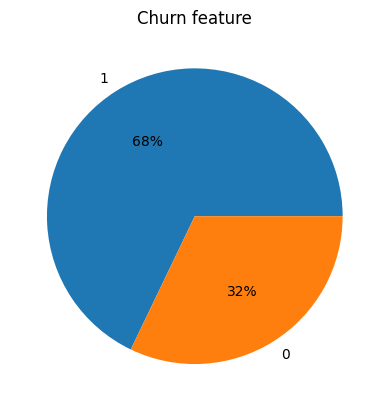

In [ ]:
plt.pie(x = data1["Churn"].value_counts().reset_index()["Churn"],
        labels = data1["Churn"].value_counts().reset_index()["index"],
        autopct='%.0f%%')
plt.title("Churn feature")

* In dat Shared 68% of the Drivers have attritioned only 32% have retained
* Huge Imbalance in the Data,we have to address imbalnce before model training

## Age

In [ ]:
data1.Age.nunique()

35

In [ ]:
data1.Age.describe()

count    2381.000000
mean       33.090718
std         5.840686
min        21.000000
25%        29.000000
50%        33.000000
75%        37.000000
max        58.000000
Name: Age, dtype: float64

<Axes: xlabel='Age', ylabel='count'>

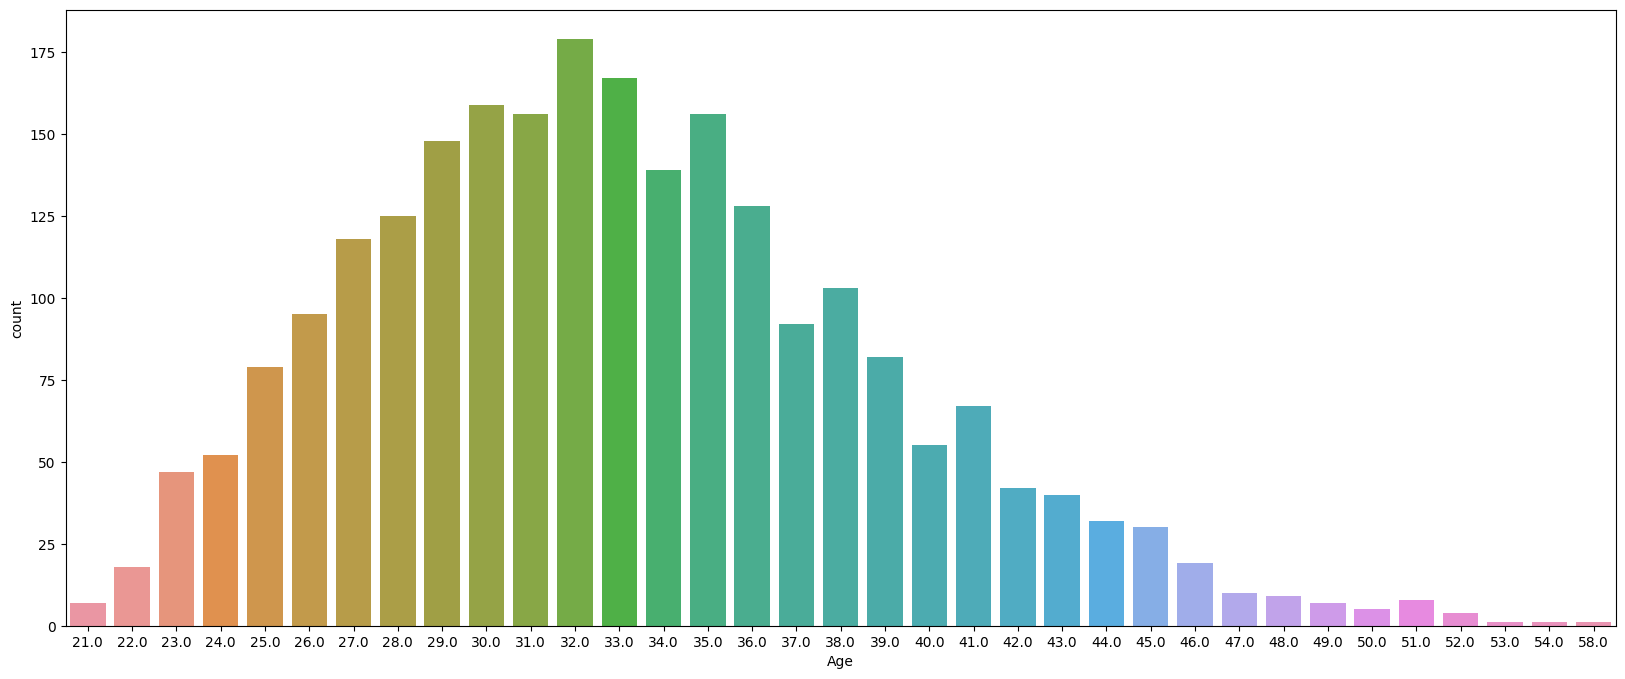

In [ ]:
plt.figure(figsize = (20,8))
sns.countplot(x=data1["Age"])

In [ ]:
data1["Age"].describe()

count    2381.000000
mean       33.090718
std         5.840686
min        21.000000
25%        29.000000
50%        33.000000
75%        37.000000
max        58.000000
Name: Age, dtype: float64

* 50% of driver have age range between 29~37
* Min age of Driver is 21 Years
* Max age of Driver is 58 Years

* Lets bin the Age ranges to Reduce the No of Categories in Age

In [ ]:
data1["Age_bins"] = pd.cut(data1["Age"], bins = [20,30,40,50,60],
                           labels=(1,2,3,4))

In [ ]:
data1["Age_bins"].value_counts()

2    1257
1     848
3     261
4      15
Name: Age_bins, dtype: int64

<Axes: xlabel='Age_bins', ylabel='count'>

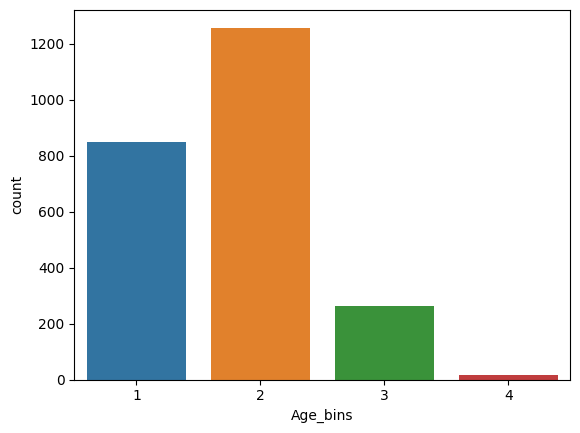

In [ ]:
sns.countplot(x=data1["Age_bins"])

In [ ]:
pd.crosstab(data1["Age_bins"],data1["Churn"],normalize = "index")

Churn,0,1
Age_bins,,
1,0.298349,0.701651
2,0.340493,0.659507
3,0.306513,0.693487
4,0.266667,0.733333


* Majaority of Driver lie in the Age range 20~30
* Attrition almost same in all Age range...compartievely slightly high in 50~60 range

## Gender

In [ ]:
data1["Gender"].value_counts()

0.0    1404
1.0     977
Name: Gender, dtype: int64

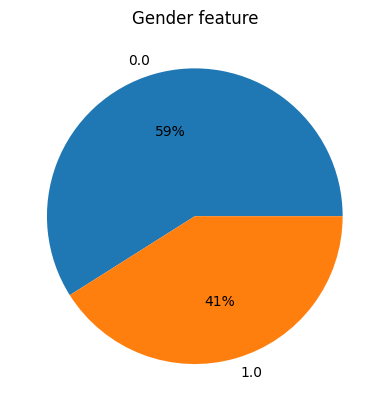

In [ ]:
plt.pie(x = data1["Gender"].value_counts().reset_index()["Gender"],
        labels = data1["Gender"].value_counts().reset_index()["index"],
        autopct='%.0f%%')
plt.title("Gender feature")
plt.show()

In [ ]:
pd.crosstab(data1["Gender"],data1["Churn"],normalize = "index")

Churn,0,1
Gender,,
0.0,0.324786,0.675214
1.0,0.316274,0.683726


* 59% of Drivers are Male, 41% are Female
* Attrition rate is almost same irrepective of Gender

## Education_Level

<Axes: xlabel='Education_Level', ylabel='count'>

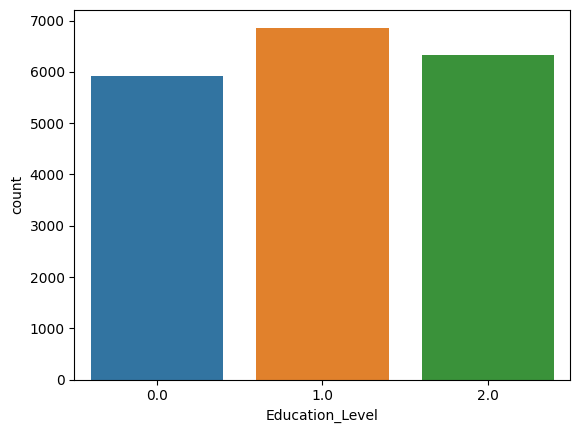

In [ ]:
sns.countplot(x= data["Education_Level"])

In [ ]:
pd.crosstab(data1["Education_Level"],data1["Churn"],normalize = "index")

Churn,0,1
Education_Level,,
0.0,0.308673,0.691327
1.0,0.337107,0.662893
2.0,0.317955,0.682045


* Driver with Eduction 12+ are comparitively high
* Attrition rate is almost same w.r.t Education level

## Joining Designation

<Axes: xlabel='Joining Designation', ylabel='count'>

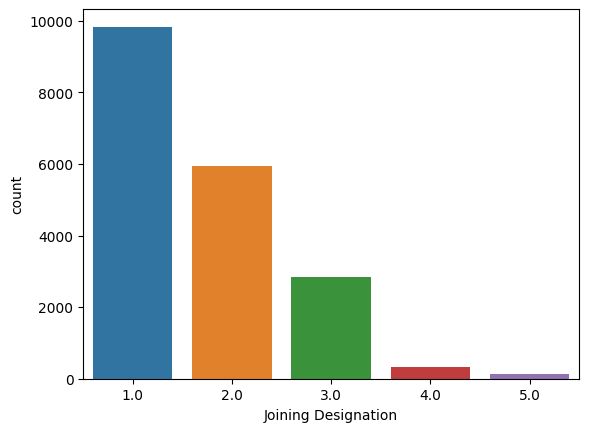

In [ ]:
sns.countplot(x= data["Joining Designation"])

In [ ]:
pd.crosstab(data1["Joining Designation"],data1["Churn"],normalize = "index")

Churn,0,1
Joining Designation,,
1.0,0.267057,0.732943
2.0,0.312883,0.687117
3.0,0.444219,0.555781
4.0,0.388889,0.611111
5.0,0.272727,0.727273


* Majority of Driver are having Joning Grade as "1"
* Attrition rate is highest with Driver having Joinin Grade as "1"
* Attrition rate is least with Driver having Joinin Grade as "3"

## Total Business Value

* Total Bussines Value is Average amount of Value brought by the driver to the Company

In [ ]:
data1["Total Business Value"].describe()

count    2.381000e+03
mean     3.120854e+05
std      4.495705e+05
min     -1.979329e+05
25%      0.000000e+00
50%      1.506244e+05
75%      4.294988e+05
max      3.972128e+06
Name: Total Business Value, dtype: float64

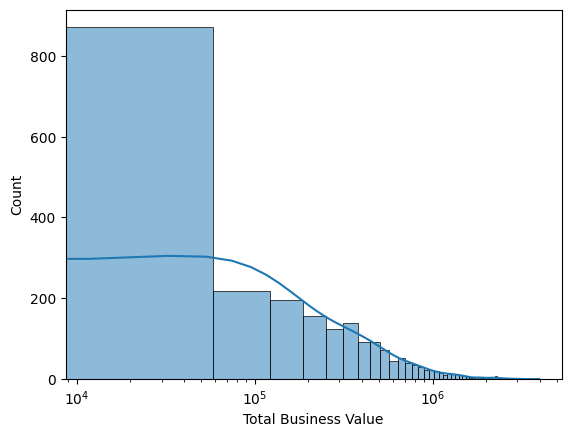

In [ ]:
sns.histplot(data1["Total Business Value"],kde = True )
plt.xscale("log")

* Average Total Bussiness values borught by the Driver range from -197,932 ~ 3,972,128
* 25% of Driver have Negative Average value to Compnay
* 50% of Driver have Average Values to Company < 429,498

## City

In [ ]:
data1["City"].value_counts()

C20    152
C15    101
C29     96
C26     93
C8      89
C27     89
C10     86
C16     84
C22     82
C3      82
C28     82
C12     81
C5      80
C1      80
C21     79
C14     79
C6      78
C4      77
C7      76
C9      75
C25     74
C23     74
C24     73
C19     72
C2      72
C17     71
C13     71
C18     69
C11     64
Name: City, dtype: int64

<Axes: xlabel='City', ylabel='count'>

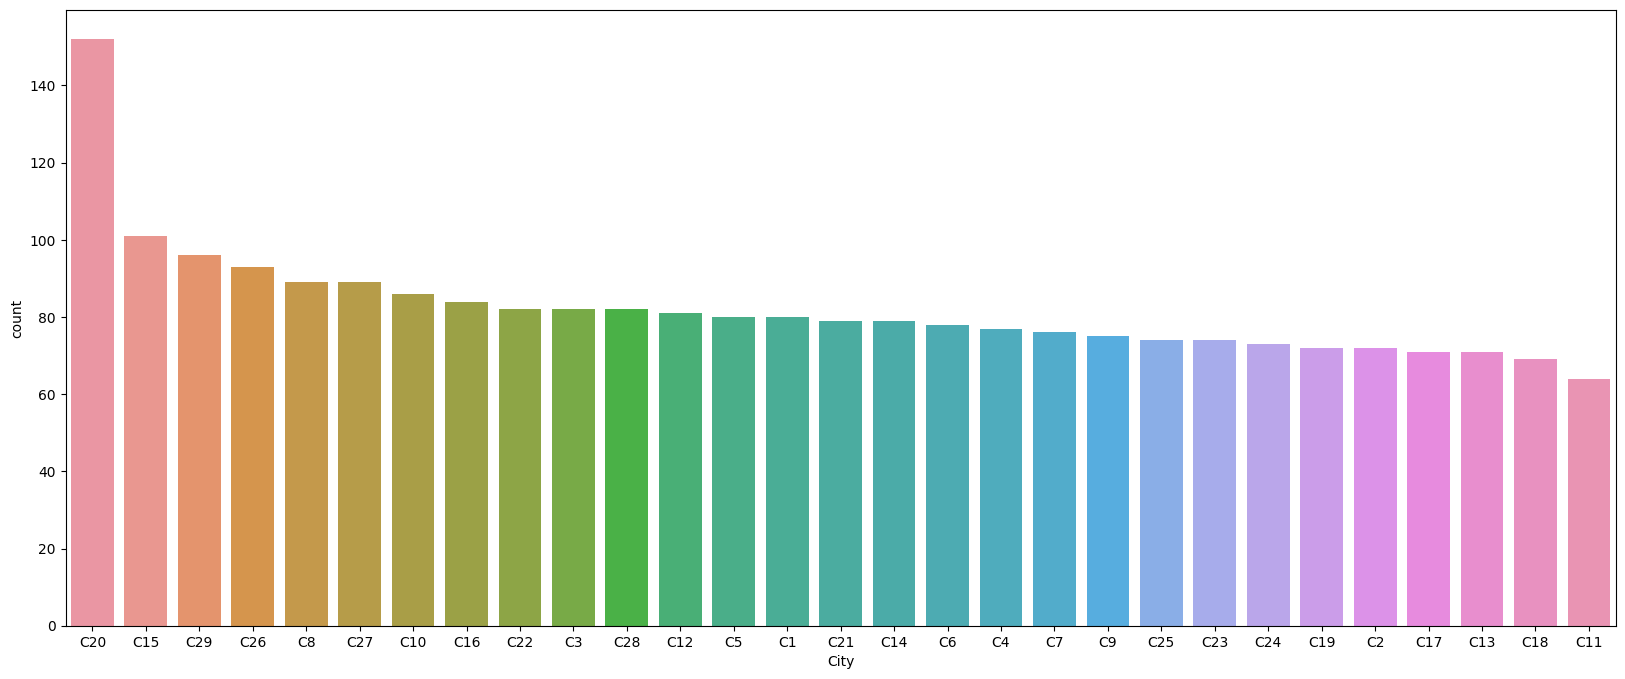

In [ ]:
plt.figure(figsize = (20,8))
sns.countplot(data=data1, x= "City" ,order = data1["City"].value_counts().index)

<Axes: xlabel='City', ylabel='count'>

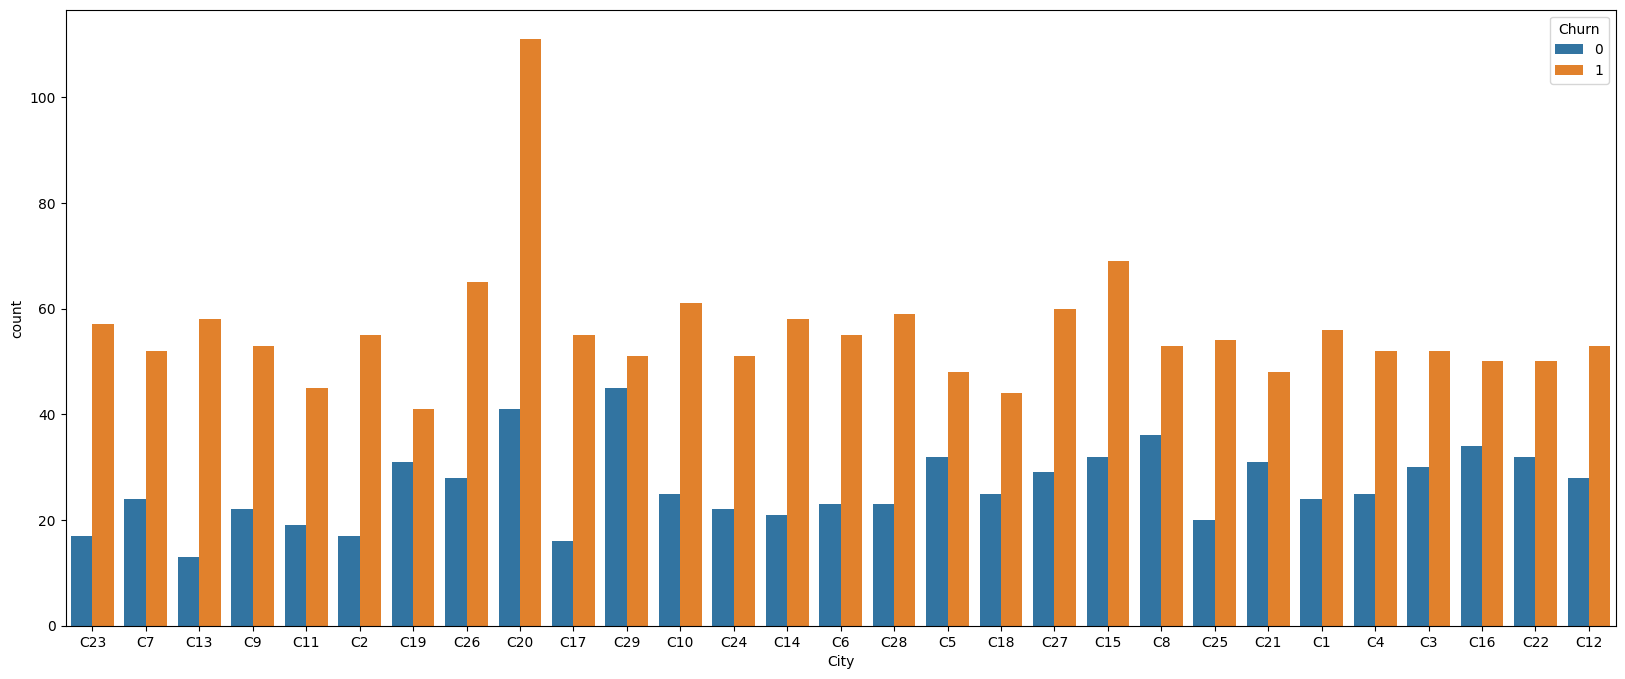

In [ ]:
plt.figure(figsize = (20,8))
sns.countplot(data=data1, hue="Churn", x= "City")

In [ ]:
pd.crosstab(data1["City"],data1["Churn"],normalize = "index").reset_index().sort_values(1,ascending = False)[:10]

Churn,City,0,1
4,C13,0.183099,0.816901
8,C17,0.225352,0.774648
15,C23,0.229730,0.770270
11,C2,0.236111,0.763889
5,C14,0.265823,0.734177
12,C20,0.269737,0.730263
17,C25,0.270270,0.729730
20,C28,0.280488,0.719512
1,C10,0.290698,0.709302
28,C9,0.293333,0.706667


* Most no of Drivers are from city "C20"
* Least no of Driver from "C11"
* Driver Attrition rate is highest in the City "C13"

## Income

In [ ]:
data1["Income"].value_counts()

0    2338
1      43
Name: Income, dtype: int64

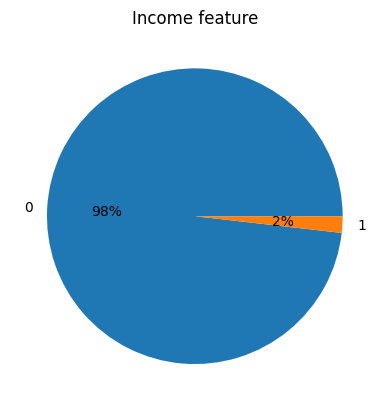

In [ ]:
plt.pie(x = data1["Income"].value_counts().reset_index()["Income"],
        labels = data1["Income"].value_counts().reset_index()["index"],
        autopct='%.0f%%')
plt.title("Income feature")
plt.show()

In [ ]:
pd.crosstab(data1["Income"],data1["Churn"],normalize = "index")

Churn,0,1
Income,,
0,0.310094,0.689906
1,0.930233,0.069767


* only 2 % of Driver had their Income Growth
* Very low 6.9% Attrition rate observed with Driver of Increase Income
* 68.9% Attrtition rate observed in Driver with No Income Growth

## Quarterly Rating

In [ ]:
data1["Quarterly Rating"].value_counts()

0    2023
1     358
Name: Quarterly Rating, dtype: int64

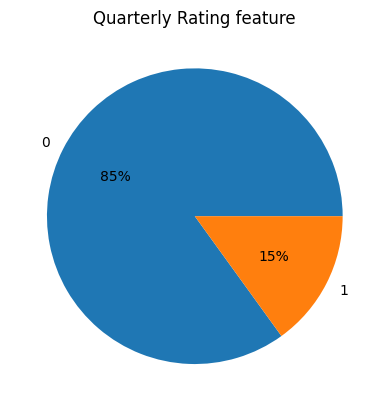

In [ ]:
plt.pie(x = data1["Quarterly Rating"].value_counts().reset_index()["Quarterly Rating"],
        labels = data1["Quarterly Rating"].value_counts().reset_index()["index"],
        autopct='%.0f%%')
plt.title("Quarterly Rating feature")
plt.show()

In [ ]:
pd.crosstab(data1["Quarterly Rating"],data1["Churn"],normalize = "index")

Churn,0,1
Quarterly Rating,,
0,0.24172,0.75828
1,0.77095,0.22905


* only 15 % of Driver had their Quaterly Rating Increase
* 23% Attrition rate observed with Driver Quaterly Rating has Increase
* whereas 77% Attrtition rate observed in Driver with Quaterly Rating Increase

## Grade

In [ ]:
data1["Grade"].value_counts()

0    2338
1      43
Name: Grade, dtype: int64

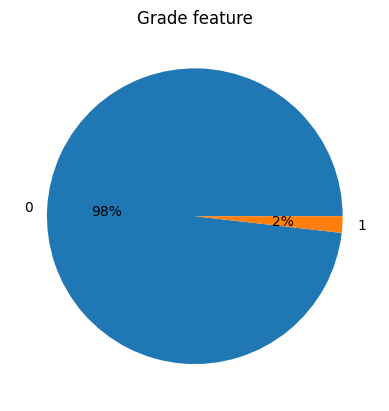

In [ ]:
plt.pie(x = data1["Grade"].value_counts().reset_index()["Grade"],
        labels = data1["Grade"].value_counts().reset_index()["index"],
        autopct='%.0f%%')
plt.title("Grade feature")
plt.show()

In [ ]:
pd.crosstab(data1["Grade"],data1["Churn"],normalize = "index")

Churn,0,1
Grade,,
0,0.310094,0.689906
1,0.930233,0.069767


* only 2 % of Driver had their Grade Growth
* Very low 6.9% Attrition rate observed with Driver of Increase in Grade
* 68.9% Attrtition rate observed in Driver with No Grade Growth

# **Finding & Treating Outliers Using IQR**

## IQR Analysis and Outlier Finding

* We will create a new Dataframe " outlier" which store Boolean value of IQR Analysis Result for each reading of all numerical feature columns

In [ ]:
# Finding outlier for all Numerical features
outlier = pd.DataFrame() # creating as new dataframe to store outliers for each numerical feature
for z in ["Total Business Value"]:
    print(z,"Feature")
    print("*******************************************************************")
    IQR = np.percentile(data1[z],75) - np.percentile(data1[z],25)
    lower_limit = np.percentile(data1[z],25) - 1.5*IQR
    upper_limit = np.percentile(data1[z],75) + 1.5*IQR
    outlier[z] = (data1[z]>upper_limit) | (data1[z]<lower_limit)

    print("Minimum -->",data1[z].min())
    print("Lower Limit -->",lower_limit)
    print("Quantile25 -->",np.percentile(data1[z],25))
    print("Median -->",np.percentile(data1[z],50))
    print("Quantile75 -->",np.percentile(data1[z],75))
    print("Upper Limit -->",upper_limit)
    print("Maximum -->",data1[z].max())

    print()
    print("Out of ",len(data1[z]), "Data points , There are",outlier[z].sum(),"Outliers")
    print("Percentage of Outliers:",np.round((outlier[z].sum()/len(data1[z])*100),2),"%")
    print()
    print("*******************************************************************")

Total Business Value Feature
*******************************************************************
Minimum --> -197932.85714285713
Lower Limit --> -644248.125
Quantile25 --> 0.0
Median --> 150624.44444444444
Quantile75 --> 429498.75
Upper Limit --> 1073746.875
Maximum --> 3972127.5

Out of  2381 Data points , There are 148 Outliers
Percentage of Outliers: 6.22 %

*******************************************************************


* 148 [6.22%] outliers observed in Total Bussiness Value

## Box-Plot for Outlier Visualization

* Let us visualize the outliers with Box plot

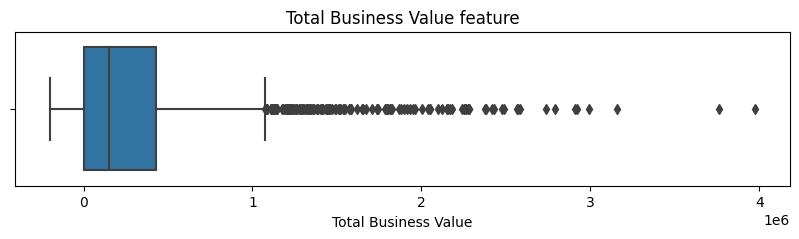

In [ ]:
for z in ["Total Business Value"]:
  plt.figure(figsize=(10,2))
  sns.boxplot(data= data1, x = z)
  plt.title(z+" feature")

## Outlier Treatment

* From above graph we can see Total Bussiness Value have Outliers
* But Some of the Outliers have Relevance , so we will not treat all the outlier
* We will Convert the Total Bussiness Values into Categories base on percentile using pd.cut
** Minimum --> -197932.85714285713
** Lower Limit --> -644248.125
** Quantile25 --> 0.0
** Median --> 150624.44444444444
** Quantile75 --> 429498.75
** Upper Limit --> 1073746.875
** Maximum --> 3972127.5
**  bins = [-197935,0.0,150624,429498,1073746,3972128] --> [Minimum,Quantile25,Median,Quantile75,Upper Limit, Maximum]

In [ ]:
data1["TBV_bins"] = pd.cut(data1["Total Business Value"], bins = [-197935,0.0,150624,429498,1073746,3972128],
                           labels=(1,2,3,4,5))

In [ ]:
data1['TBV_bins'].value_counts()

1    729
3    595
2    461
4    448
5    148
Name: TBV_bins, dtype: int64

* Total Bussiness Value data have converted to Bins , thereby we addressed Outliers and maintained the significance of the Values through Ordinal Coding

# **Feature Engineering**

In [ ]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2381 entries, 0 to 2380
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   Age                   2381 non-null   float64 
 1   Gender                2381 non-null   float64 
 2   City                  2381 non-null   object  
 3   Education_Level       2381 non-null   float64 
 4   Joining Designation   2381 non-null   float64 
 5   Total Business Value  2381 non-null   float64 
 6   Income                2381 non-null   int64   
 7   Quarterly Rating      2381 non-null   int64   
 8   Grade                 2381 non-null   int64   
 9   Churn                 2381 non-null   int64   
 10  Age_bins              2381 non-null   category
 11  TBV_bins              2381 non-null   category
dtypes: category(2), float64(5), int64(4), object(1)
memory usage: 209.7+ KB


## Eliminate Reduntant features

* We can drop features - "Age","Total Business Value " as we have already created similar feature using pd.cut

In [ ]:
data1.drop(["Age","Total Business Value"], inplace = True, axis=1)

In [ ]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2381 entries, 0 to 2380
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Gender               2381 non-null   float64 
 1   City                 2381 non-null   object  
 2   Education_Level      2381 non-null   float64 
 3   Joining Designation  2381 non-null   float64 
 4   Income               2381 non-null   int64   
 5   Quarterly Rating     2381 non-null   int64   
 6   Grade                2381 non-null   int64   
 7   Churn                2381 non-null   int64   
 8   Age_bins             2381 non-null   category
 9   TBV_bins             2381 non-null   category
dtypes: category(2), float64(3), int64(4), object(1)
memory usage: 172.5+ KB


* No Reduntant Feature available,
* From Hypothesis Testing we can say all feature are useful Predictor of "Chance of Admit"

## Encoding : Non-Numerical to Numerical

* we have to Convert Feature "City" from Categorical to Numerical

* First Let Encode our Target Variable

In [ ]:
data1["Churn"].value_counts()

1    1616
0     765
Name: Churn, dtype: int64

Now let encode rest of the Categorical Features

* we will follow below encoding Strategy for rest of categorical features
* if Feature wise unique Value[n]
** n<=2 --> LabelEncoder
** 3<= n <=5 --> One Hot Encoding
** n >5 -->Target Encoding

In Feature "City", we have 29 Categories, so we will use Target Encoder

In [ ]:
data1.City.nunique()

29

In [ ]:
te=TargetEncoder()
data1["City"]=te.fit_transform(data1["City"],data1["Churn"])

In [ ]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2381 entries, 0 to 2380
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Gender               2381 non-null   float64 
 1   City                 2381 non-null   float64 
 2   Education_Level      2381 non-null   float64 
 3   Joining Designation  2381 non-null   float64 
 4   Income               2381 non-null   int64   
 5   Quarterly Rating     2381 non-null   int64   
 6   Grade                2381 non-null   int64   
 7   Churn                2381 non-null   int64   
 8   Age_bins             2381 non-null   category
 9   TBV_bins             2381 non-null   category
dtypes: category(2), float64(4), int64(4)
memory usage: 172.5 KB


In [ ]:
data1.head()

,Gender,City,Education_Level,Joining Designation,Income,Quarterly Rating,Grade,Churn,Age_bins,TBV_bins
0,0.0,0.769859,2.0,1.0,0,0,0,1,1,4
1,0.0,0.684190,2.0,2.0,0,0,0,0,2,1
2,0.0,0.816064,2.0,2.0,0,0,0,1,3,2
3,0.0,0.706553,0.0,1.0,0,0,0,1,1,2
4,1.0,0.702829,1.0,3.0,0,1,0,0,2,3


## Scaling of Numerical Categories

* Let us do KS test for Goodness of Fit to check for  Normal Distribution in order to decide the type of scaler ot be used [ Minmax or Standard Scaler]

In [ ]:
# H0 : Data is Gaussian
# Ha : Data is not Gaussian
for i in data1.columns:
  test_stat, p_value = kstest(data1[i],stats.norm.cdf)
  print(p_value)
  if p_value < 0.05:
       print("Reject H0")
       print(i,"Data is Not Gaussian")
  else:
       print("Fail to reject H0")
       print(i,"Data is Gaussian")
  print()

0.0
Reject H0
Gender Data is Not Gaussian

0.0
Reject H0
City Data is Not Gaussian

0.0
Reject H0
Education_Level Data is Not Gaussian

0.0
Reject H0
Joining Designation Data is Not Gaussian

0.0
Reject H0
Income Data is Not Gaussian

0.0
Reject H0
Quarterly Rating Data is Not Gaussian

0.0
Reject H0
Grade Data is Not Gaussian

0.0
Reject H0
Churn Data is Not Gaussian

0.0
Reject H0
Age_bins Data is Not Gaussian

0.0
Reject H0
TBV_bins Data is Not Gaussian



* we have observed that All the Numericals are not following Normal Distribution, so we cannot do Standardization
* Now we will do Normalization using Minmax Scaler



In [ ]:
Normscaler = MinMaxScaler()

In [ ]:
scaleddata = Normscaler.fit_transform(data1)

In [ ]:
scaleddata

array([[0.        , 0.83772787, 1.        , ..., 1.        , 0.        ,
        0.75      ],
       [0.        , 0.53686301, 1.        , ..., 0.        , 0.33333333,
        0.        ],
       [0.        , 1.        , 1.        , ..., 1.        , 0.66666667,
        0.25      ],
       ...,
       [0.        , 0.13598406, 0.        , ..., 1.        , 0.66666667,
        0.5       ],
       [1.        , 0.6986695 , 1.        , ..., 1.        , 0.        ,
        0.5       ],
       [0.        , 0.50164366, 1.        , ..., 0.        , 0.        ,
        0.5       ]])

In [ ]:
scaleddata = pd.DataFrame(scaleddata,columns = data1.columns)

In [ ]:
scaleddata

,Gender,City,Education_Level,Joining Designation,Income,Quarterly Rating,Grade,Churn,Age_bins,TBV_bins
0,0.0,0.837728,1.0,0.00,0.0,0.0,0.0,1.0,0.000000,0.75
1,0.0,0.536863,1.0,0.25,0.0,0.0,0.0,0.0,0.333333,0.00
2,0.0,1.000000,1.0,0.25,0.0,0.0,0.0,1.0,0.666667,0.25
3,0.0,0.615400,0.0,0.00,0.0,0.0,0.0,1.0,0.000000,0.25
4,1.0,0.602321,0.5,0.50,0.0,1.0,0.0,0.0,0.333333,0.50
...,...,...,...,...,...,...,...,...,...,...
2376,0.0,0.587228,0.0,0.25,0.0,1.0,0.0,0.0,0.333333,0.75
2377,1.0,0.615400,0.0,0.00,0.0,0.0,0.0,1.0,0.333333,0.00
2378,0.0,0.135984,0.0,0.25,0.0,0.0,0.0,1.0,0.666667,0.50
2379,1.0,0.698669,1.0,0.00,0.0,0.0,0.0,1.0,0.000000,0.50


In [ ]:
scaleddata.describe()

,Gender,City,Education_Level,Joining Designation,Income,Quarterly Rating,Grade,Churn,Age_bins,TBV_bins
count,2381.000000,2381.000000,2381.000000,2381.000000,2381.000000,2381.000000,2381.000000,2381.000000,2381.000000,2381.000000
mean,0.410332,0.517447,0.503780,0.205061,0.018060,0.150357,0.018060,0.678706,0.255355,0.376627
std,0.491997,0.229527,0.408145,0.210358,0.133195,0.357496,0.133195,0.467071,0.220209,0.317436
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.361427,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.587228,0.500000,0.250000,0.000000,0.000000,0.000000,1.000000,0.333333,0.500000
75%,1.000000,0.660622,1.000000,0.250000,0.000000,0.000000,0.000000,1.000000,0.333333,0.750000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Bivariate - Correlation Matrix

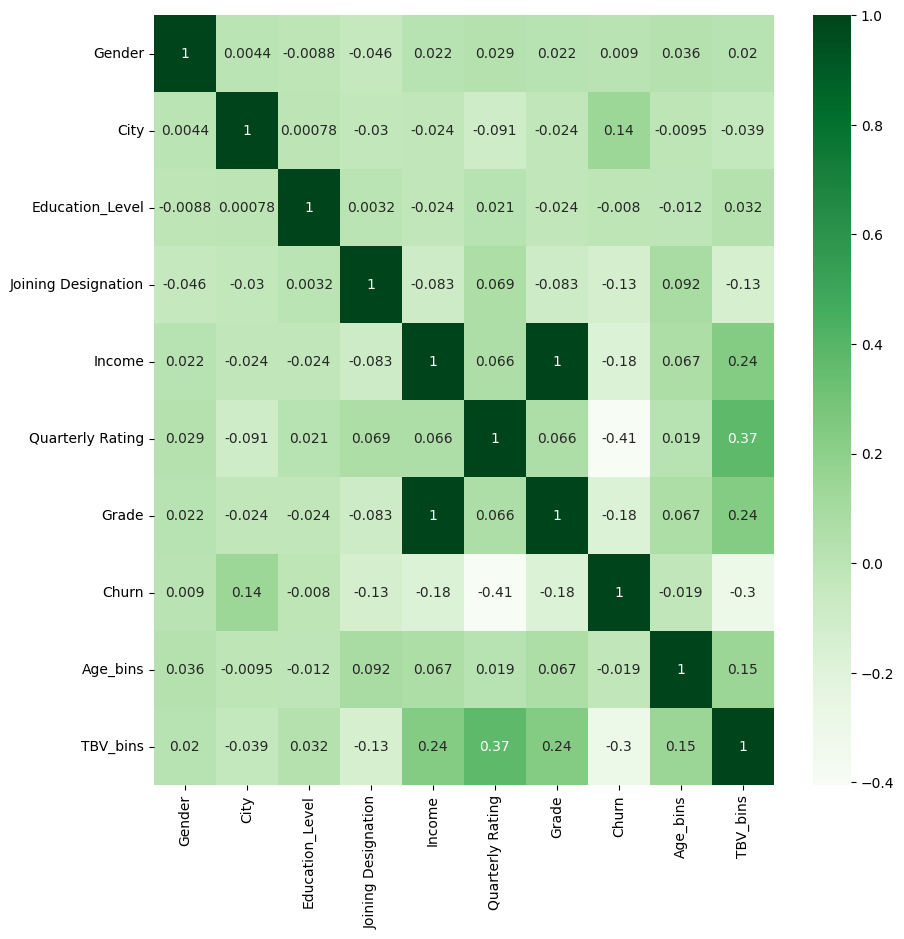

In [ ]:
plt.figure(figsize =(10,10))
sns.heatmap(scaleddata.corr(),annot=True,cmap = "Greens")
plt.show()

* Income and Grade Feature feature are Perfectly Correlated
* Basically these are Flag --> if "1" in Income feature  means Driver Income increases similarily if "1" in Grade Feature means Driver Grade Increase
* So we will drop Grade Feature

In [ ]:
scaleddata.drop(["Grade"], inplace = True, axis=1)

In [ ]:
scaleddata.head()

,Gender,City,Education_Level,Joining Designation,Income,Quarterly Rating,Churn,Age_bins,TBV_bins
0,0.0,0.837728,1.0,0.00,0.0,0.0,1.0,0.000000,0.75
1,0.0,0.536863,1.0,0.25,0.0,0.0,0.0,0.333333,0.00
2,0.0,1.000000,1.0,0.25,0.0,0.0,1.0,0.666667,0.25
3,0.0,0.615400,0.0,0.00,0.0,0.0,1.0,0.000000,0.25
4,1.0,0.602321,0.5,0.50,0.0,1.0,0.0,0.333333,0.50


## Final data - Dividing Data for Training & Test

* Our desired Outcome is "Churn"
* So we will divide our scaleddata into X,y
* we will use 80:20 ratio for train & test
* Further we will Divide X & y as below data sets
** Xtrain
** Xtest
** ytrain
** ytest

In [ ]:
Xtrain, Xtest, ytrain, ytest = train_test_split(scaleddata.drop(["Churn"], axis = 1), scaleddata["Churn"], test_size=0.2, random_state=32)

In [ ]:
Xtrain.shape, Xtest.shape, ytrain.shape, ytest.shape

((1904, 8), (477, 8), (1904,), (477,))

# **Data Balancing**

In [ ]:
ytrain.value_counts()

1.0    1286
0.0     618
Name: Churn, dtype: int64

In [ ]:
1286/618

2.0809061488673137

* Data is Highly Imbalance, More data points are avaiable for Attritioned Driver
* So we will use SMOTE to Balance Data

In [ ]:
from imblearn.over_sampling import SMOTE
print('Before SMOTE')
print(ytrain.value_counts())

Xtrainsm, ytrainsm = SMOTE().fit_resample(Xtrain,ytrain)
print('After Oversampling')
print(ytrainsm.value_counts())

Before SMOTE
1.0    1286
0.0     618
Name: Churn, dtype: int64
After Oversampling
1.0    1286
0.0    1286
Name: Churn, dtype: int64


* Now our data is balanced

# **Model Training - Random Forest[Ensemble - Bagging]**

## **Hyperparameter Tuning for RF**

In [ ]:
params = {
    'n_estimators' : [100,300,500],
    'max_depth' : [3,5,10],
    'max_features' : [3,5,8],
    'bootstrap' : [True,False]
    }

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier


random = RandomizedSearchCV(estimator = RandomForestClassifier(random_state=7),
                            param_distributions = params,
                            scoring = 'recall',
                            cv = 3,
                            n_iter=15,
                            n_jobs=-1
                            )

In [ ]:
# 1st Random search
random.fit(Xtrainsm, ytrainsm)

print("Best param: ", random.best_params_)
print("Best score: ", random.best_score_)

Best param:  {'n_estimators': 100, 'max_features': 5, 'max_depth': 3, 'bootstrap': False}
Best score:  0.8802874176705954


In [ ]:
# 2nd Random search
random.fit(Xtrainsm, ytrainsm)

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=7),
                   n_iter=15, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [3, 5, 10],
                                        'max_features': [3, 5, 8],
                                        'n_estimators': [100, 300, 500]},
                   scoring='recall')

In [ ]:
print("Best param: ", random.best_params_)
print("Best score: ", random.best_score_)

Best param:  {'n_estimators': 500, 'max_features': 3, 'max_depth': 5, 'bootstrap': False}
Best score:  0.8825948195107074


In [ ]:
# 3rd Random Search
random.fit(Xtrainsm, ytrainsm)

print("Best param: ", random.best_params_)
print("Best score: ", random.best_score_)

Best param:  {'n_estimators': 300, 'max_features': 5, 'max_depth': 3, 'bootstrap': False}
Best score:  0.8826184200015975


In [ ]:
params1 = {
    'n_estimators' : [100,300,500],
    'max_depth' : [3,5,6],
    'max_features' : [3,5,6],
    'bootstrap' : [False]
    }

In [ ]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(estimator = RandomForestClassifier(random_state=7),
                    param_grid = params1,
                    scoring = 'recall',
                    cv = 3,
                    n_jobs=-1,
                    )

In [ ]:
grid.fit(Xtrainsm, ytrainsm)

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=7), n_jobs=-1,
             param_grid={'bootstrap': [False], 'max_depth': [3, 5, 6],
                         'max_features': [3, 5, 6],
                         'n_estimators': [100, 300, 500]},
             scoring='recall')

In [ ]:
print("Best params: ", grid.best_params_)
print("Best score: ", grid.best_score_)

Best params:  {'bootstrap': False, 'max_depth': 3, 'max_features': 5, 'n_estimators': 300}
Best score:  0.8826184200015975


* From Random and Grid Search we were able to fix out Hyper parameters
** max_depth = 3
** max_features = 5
** n_estimators = 300
** bootstrap = False

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(random_state=7,max_features = 5,max_depth=3, n_estimators=300, bootstrap=false,criterion='gini')

In [ ]:
rf_clf.fit(Xtrainsm,ytrainsm)

RandomForestClassifier(max_depth=7, n_estimators=50, random_state=7)

## Accuracy

In [ ]:
rf_clf.score(Xtrainsm,ytrainsm)

0.8114307931570762

In [ ]:
ypred = rf_clf.predict(Xtest)

In [ ]:
rf_clf.score(Xtest,ytest)

0.7945492662473794

* 79% Predictions by our model are accurate

## Precision

In [ ]:
precision_score(ytest, ypred)

0.8411764705882353

* 84% of all Positive prediction are actually positve

## Recall

In [ ]:
recall_score(ytest, ypred)

0.8666666666666667

* Our Model predicts only 87% of all actual Positives as postives rest 13% of actual Positives aredetected as Negative[False Negatives]

## F1 Score

In [ ]:
f1_score(ytest,ypred)

0.853731343283582

* From F1_score of 0.85, we can say Our model has almost good balance between reducing False Positives[Detect as Churner but not] and False Negative[Actually Churner but detect as not Churner]
* However there is need to Further improve F1_Score

## Confusion Matrix

In [ ]:
conf_matrix = confusion_matrix(ytest, ypred)
conf_matrix

array([[ 93,  54],
       [ 44, 286]])

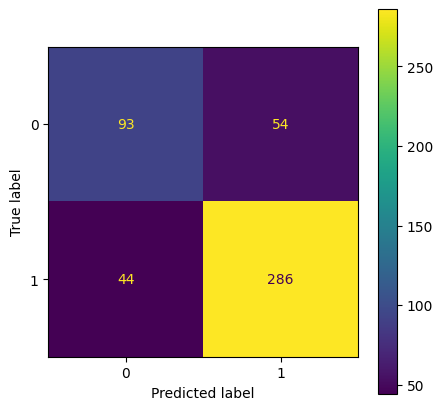

In [ ]:
fig, ax = plt.subplots(figsize=(5,5))
ConfusionMatrixDisplay(conf_matrix).plot(ax = ax)

* As Seen Earlier from High Recall and  Better Precision values, same is reflected in Confusion Matrix
* How ever our model is detecting FP & FN at almost same
* **But as per the business problem our Focus is to identify all attrition driver as acquiring new drivers is more expensive than retaining existing ones --> So we want to reduce False Negtives**

* So we will focus on Improving Recall at moderate expense of Precision by changing the threshold value for Classification


## ROC

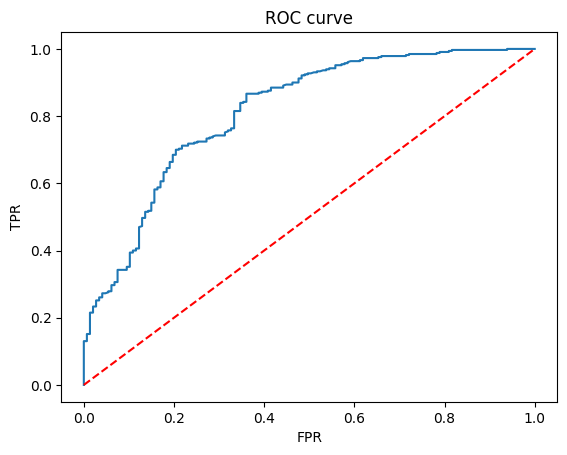

In [ ]:
probability = rf_clf.predict_proba(Xtest)
probabilites = probability[:,1]
fpr, tpr, thr = roc_curve(ytest,probabilites)

plt.plot(fpr,tpr)

#random model for reference
plt.plot(fpr,fpr,'--',color='red' )
plt.title('ROC curve')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

In [ ]:
roc_auc_score(ytest,probabilites)

0.8134611420325706

roc_auc_score is 0.81 meaning our model can 81% efficiently Distinguish Positve and Neagative Classes

## Precision Recall Curve

In [ ]:
precision, recall, thr = precision_recall_curve(ytest, probabilites)

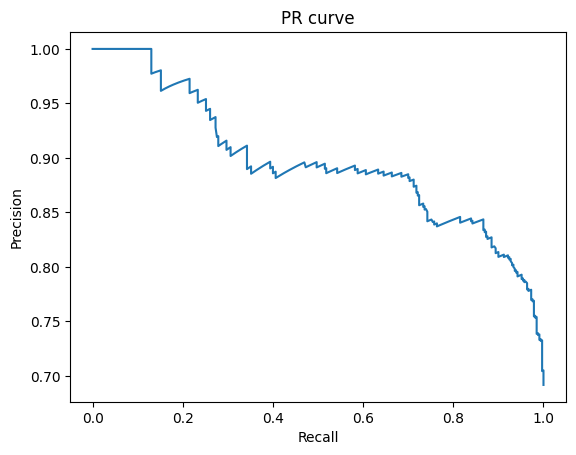

In [ ]:
plt.plot(recall, precision)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('PR curve')
plt.show()

In [ ]:
auc(recall, precision)

0.8957804551237599

* 0.895 AUC under PR curve represents that our model has high Presicion and Recall values

## Classification Report

In [ ]:
print(classification_report(ytest, ypred))

              precision    recall  f1-score   support

         0.0       0.68      0.63      0.65       147
         1.0       0.84      0.87      0.85       330

    accuracy                           0.79       477
   macro avg       0.76      0.75      0.75       477
weighted avg       0.79      0.79      0.79       477



* our Random Forest Model can detect attrition driver with
** 84% Precision
** 87% Recall
** 79% Accuracy
** 85% F1-Score

## Changing Classification Threshold for Better Recall

* As per the bussiness problem, acquiring new drivers is more expensive than retaining existing ones
* So our focus should to predict TP and Reduce FN, so that we can correctly idenitfy prospective Attrition Drivers

* Now let us plot Recall and Precision Variation w.r.t Different Classification Threshold values
* So that we can select best threshold for our Bussiness Problem

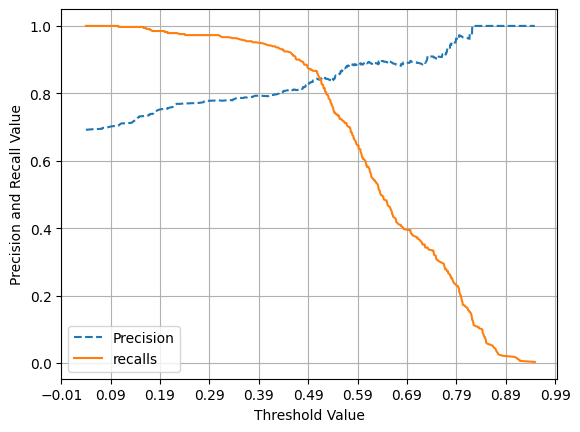

In [ ]:
def precision_recall_curve_plot(y_test, pred_proba_c1):
  precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_c1)

  threshold_boundary = thresholds.shape[0]
  # plot precision
  plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--',
           label="Precision")
  # plot recall
  plt.plot(thresholds, recalls[0:threshold_boundary], label='recalls')

  start, end = plt.xlim()
  plt.xticks(np.round(np.arange(start, end, 0.1), 2))

  plt.xlabel('Threshold Value'); plt.ylabel('Precision and Recall Value')
  plt.legend(); plt.grid()
  plt.show()

precision_recall_curve_plot(ytest, probabilites)

* So in order to increase Recall of our Model, we can reduce the Threshold from Default 0.5 --> 0.43 to get better Recall result at little degrading precision result[which is ok as per company assement]
* No we will check the Model perfromance on test data with New threshold

In [ ]:
ypredthres_043 = (rf_clf.predict_proba(Xtest)[:, 1] >= 0.43).astype(int)

In [ ]:
recall_score(ytest, ypredthres_043)

0.9333333333333333

In [ ]:
precision_score(ytest, ypredthres_043)

0.8

In [ ]:
f1_score(ytest,ypredthres_043)

0.8615384615384616

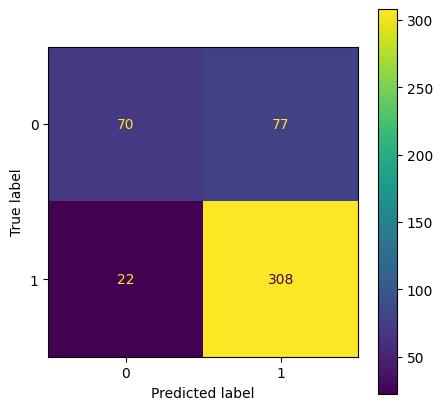

In [ ]:
conf_matrix = confusion_matrix(ytest, ypredthres_043)
fig, ax = plt.subplots(figsize=(5,5))
ConfusionMatrixDisplay(conf_matrix).plot(ax = ax)

* After Threshold Change from 0.5 --> 0.43 ,our Random Forest Model can detect attrition driver with
** Precision: 84% --> 80%
** **Recall : 87% --> 93%**
** Accuracy: No change 79%
** F1-Score : 85% --> 86%
** No of False Neagtive Reduced from 42 --> 22 [Nearly 100% Improvment]

# **Model Training - Gradient Boosting DT [Ensemble - Boosting]**

## **Hyperparameter Tuning for GBDT**

In [ ]:
params = {
    'n_estimators' : [100,300,500],
    'max_depth' : [3,5,10],
    'max_features' : [3,5,8],
    'learning_rate' : [0.01,0.05,0.1,0.5]
    }

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import GradientBoostingClassifier


random = RandomizedSearchCV(estimator = GradientBoostingClassifier(random_state=7),
                            param_distributions = params,
                            scoring = 'recall',
                            cv = 3,
                            n_iter=15,
                            n_jobs=-1
                            )

In [ ]:
# 1st Random search
random.fit(Xtrainsm, ytrainsm)

print("Best param: ", random.best_params_)
print("Best score: ", random.best_score_)

Best param:  {'n_estimators': 300, 'max_features': 8, 'max_depth': 3, 'learning_rate': 0.1}
Best score:  0.8646602618565234


In [ ]:
# 2nd Random search
random.fit(Xtrainsm, ytrainsm)

print("Best param: ", random.best_params_)
print("Best score: ", random.best_score_)

Best param:  {'n_estimators': 100, 'max_features': 3, 'max_depth': 3, 'learning_rate': 0.5}
Best score:  0.8428879012991163


In [ ]:
# 3rd Random Search
random.fit(Xtrainsm, ytrainsm)

print("Best param: ", random.best_params_)
print("Best score: ", random.best_score_)

Best param:  {'n_estimators': 100, 'max_features': 5, 'max_depth': 3, 'learning_rate': 0.01}
Best score:  0.8725101482110827


In [ ]:
params1 = {
    'n_estimators' : [100,200,300],
    'max_depth' : [3],
    'max_features' : [5,6,8],
    'learning_rate' : [0.01,0.025,0.05,0.1]
    }

In [ ]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(estimator = GradientBoostingClassifier(random_state=7),
                    param_grid = params1,
                    scoring = 'recall',
                    cv = 3,
                    n_jobs=-1,
                    )

In [ ]:
grid.fit(Xtrainsm, ytrainsm)

GridSearchCV(cv=3, estimator=GradientBoostingClassifier(random_state=7),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.025, 0.05, 0.1],
                         'max_depth': [3], 'max_features': [5, 6, 8],
                         'n_estimators': [100, 200, 300]},
             scoring='recall')

In [ ]:
print("Best params: ", grid.best_params_)
print("Best score: ", grid.best_score_)

Best params:  {'learning_rate': 0.01, 'max_depth': 3, 'max_features': 5, 'n_estimators': 100}
Best score:  0.8725101482110827


* From Random and Grid Search we were able to fix out Hyper parameters for GBDT as below
** max_depth = 3
** max_features = 5
** n_estimators = 100
** learning rate = 0.01

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gb_clf = GradientBoostingClassifier(n_estimators=100,max_depth=3,max_features = 5,learning_rate=0.01,random_state=7)
gb_clf.fit(Xtrainsm,ytrainsm)
ypred = gb_clf.predict(Xtest)

## Accuracy

In [ ]:
gb_clf.score(Xtrainsm,ytrainsm)

0.9284603421461898

In [ ]:
ypred = gb_clf.predict(Xtest)

In [ ]:
gb_clf.score(Xtest,ytest)

0.7651991614255765

* 76% Predictions by our model are accurate

## Precision

In [ ]:
precision_score(ytest, ypred)

0.807909604519774

* 80% of all Positive prediction are actually positve

## Recall

In [ ]:
recall_score(ytest, ypred)

0.8666666666666667

* Our Model predicts only 87% of all actual Positives as postives remaining 13% as Negative[Which are False Negatives]

## F1 Score

In [ ]:
f1_score(ytest,ypred)

0.8362573099415205

* From F1_score of 0.83, we can say Our model has almost good balance between reducing False Positives[Detect as attrition driver but not] and False Negative[Actually attrition driver but detect as not attrition]
* However there is need to Further improve F1_Score

## Confusion Matrix

In [ ]:
conf_matrix = confusion_matrix(ytest, ypred)
conf_matrix

array([[ 79,  68],
       [ 44, 286]])

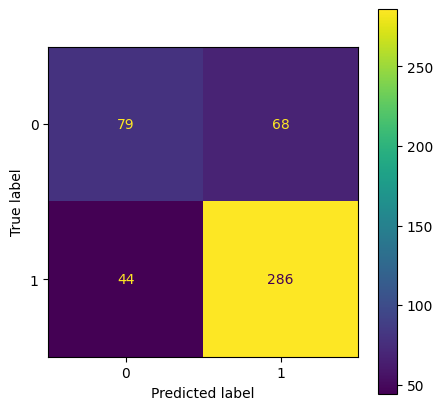

In [ ]:
fig, ax = plt.subplots(figsize=(5,5))
ConfusionMatrixDisplay(conf_matrix).plot(ax = ax)

* As Seen Earlier from High Recall and  Better Precision values, same is reflected in Confusion Matrix
* How ever our model is detecting FP & FN at almost 10% & 6% , But as per the business problem our Focus is to identify all attrition driver as acquiring new drivers is more expensive than retaining existing ones
* So we will focus on Improving Recall at moderate expense of Precision


## ROC

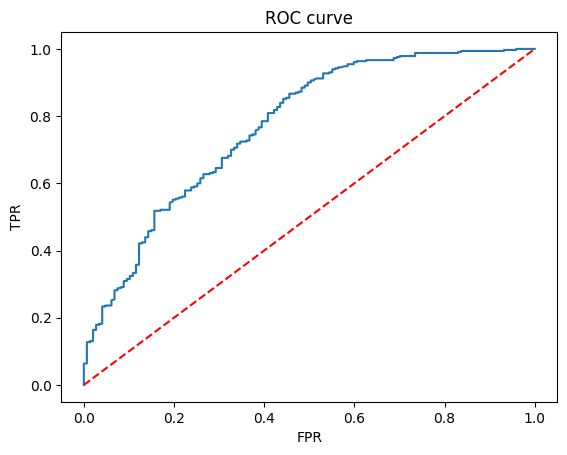

In [ ]:
probability = gb_clf.predict_proba(Xtest)
probabilites = probability[:,1]
fpr, tpr, thr = roc_curve(ytest,probabilites)

plt.plot(fpr,tpr)

#random model for reference
plt.plot(fpr,fpr,'--',color='red' )
plt.title('ROC curve')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

In [ ]:
roc_auc_score(ytest,probabilites)

0.7706761492475778

roc_auc_score is 0.77 meaning our model can 77% efficiently Distinguish Positve and Negative Classes

## Precision Recall Curve

In [ ]:
precision, recall, thr = precision_recall_curve(ytest, probabilites)

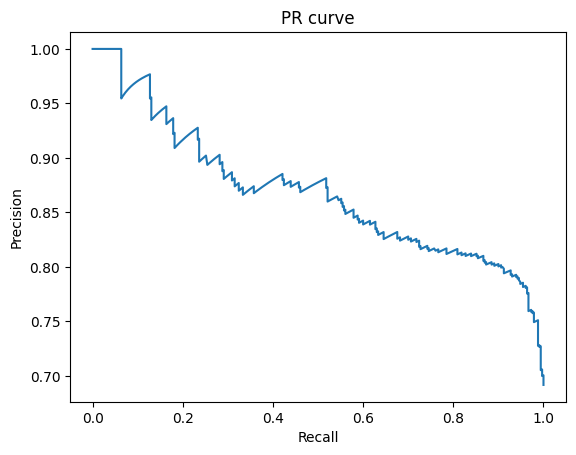

In [ ]:
plt.plot(recall, precision)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('PR curve')
plt.show()

In [ ]:
auc(recall, precision)

0.8678787549538943

* 0.867 AUC under PR curve represents that our model has high Presicion and Recall values

## Classification Report

In [ ]:
print(classification_report(ytest, ypred))

              precision    recall  f1-score   support

         0.0       0.64      0.54      0.59       147
         1.0       0.81      0.87      0.84       330

    accuracy                           0.77       477
   macro avg       0.73      0.70      0.71       477
weighted avg       0.76      0.77      0.76       477



* our GBDT Model can detect attrition driver with
** 81% Precision
** 87% Recall
** 77% Accuracy
** 84% F1-Score

## Changing Classification Threshold for Better Recall

* As per the bussiness problem, acquiring new drivers is more expensive than retaining existing ones
* So our focus should to predict TP and Reduce FN, so that we can correctly idenitfy prospective Attrition Drivers

* Now let us plot Recall and Precision Variation w.r.t Different Classification Threshold values
* So that we can select best threshold for our Bussiness Problem

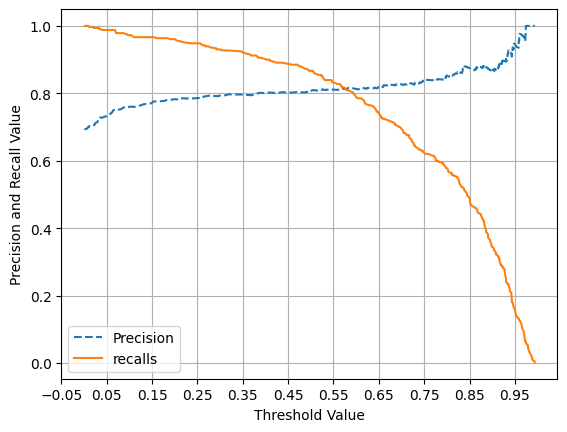

In [ ]:
def precision_recall_curve_plot(y_test, pred_proba_c1):
  precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_c1)

  threshold_boundary = thresholds.shape[0]
  # plot precision
  plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--',
           label="Precision")
  # plot recall
  plt.plot(thresholds, recalls[0:threshold_boundary], label='recalls')

  start, end = plt.xlim()
  plt.xticks(np.round(np.arange(start, end, 0.1), 2))

  plt.xlabel('Threshold Value'); plt.ylabel('Precision and Recall Value')
  plt.legend(); plt.grid()
  plt.show()

precision_recall_curve_plot(ytest, probabilites)

* So in order to increase Recall of our Model, we can reduce the Threshold from Default 0.5 --> 0.37 to get better Recall result at little degrading precision result[which is ok as per company assement]
* No we will check the Model perfromance on test data with New threshold

In [ ]:
ypredthres_037 = (rf_clf.predict_proba(Xtest)[:, 1] >= 0.37).astype(int)

In [ ]:
recall_score(ytest, ypredthres_037)

0.9545454545454546

In [ ]:
precision_score(ytest, ypredthres_037)

0.7894736842105263

In [ ]:
f1_score(ytest,ypredthres_037)

0.8641975308641975

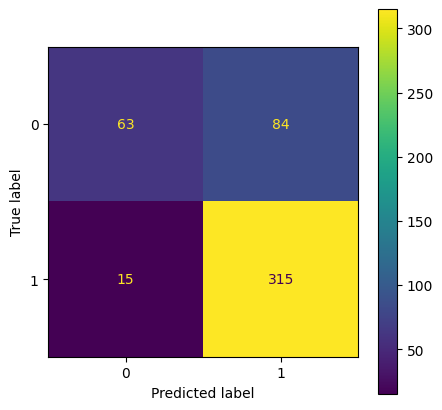

In [ ]:
conf_matrix = confusion_matrix(ytest, ypredthres_037)
fig, ax = plt.subplots(figsize=(5,5))
ConfusionMatrixDisplay(conf_matrix).plot(ax = ax)

* After Threshold Change from 0.5 --> 0.37 ,our GBDT Model can detect attrition driver with
** Precision: 81% --> 78%
** Recall : 87% --> 95%
** Accuracy: No change 77%
** F1-Score : 84% --> 86%
** False Negative Reduced from 44 --> 15 [approx 150% Improvment]

# **Bussiness Insights**

## Exploratory Data Analysis

* In OLA dataset Shared 68% of the Drivers have attritioned only 32% have retained
* Huge Imbalance in the Data,we have to address imbalnce before model training
* 50% of driver have age range between 29~37
* Min age of Driver is 21 Years
* Max age of Driver is 58 Years
* Attrition almost same in all Age range...compartievely slightly high in 50~60 range
* 59% of Drivers are Male, 41% are Female
* Attrition rate is almost same irrepective of Gender
* Driver with Eduction 12+ are comparitively high
* Attrition rate is almost same w.r.t Education level
* Majority of Driver are having Joning Grade as "1"
* Attrition rate is highest with Driver having Joinin Grade as "1"
* Attrition rate is least with Driver having Joinin Grade as "3"
* Average Total Bussiness values borught by the Driver range from -197,932 ~ 3,972,128
* 25% of Driver have Negative Average value to Compnay
* 50% of Driver have Average Values to Company < 429,498
* Most no of Drivers are from city "C20"
* Least no of Driver from "C11"
* Driver Attrition rate is highest in the City "C13"
* only 2 % of Driver had their Income Growth
* Very low 6.9% Attrition rate observed with Driver of Increase Income
* 68.9% Attrtition rate observed in Driver with No Income Growth
* Only 15 % of Driver had their Quaterly Rating Increase
* 23% Attrition rate observed with Drivers whose Quaterly Rating has Increased
* whereas 77% Attrtition rate observed with Driver whose Quaterly Rating has not Increased
* only 2 % of Driver had their Grade Growth
* Very low 6.9% Attrition rate observed with Driver of Increase in Grade
* 68.9% Attrtition rate observed in Driver with No Grade Growth
* Newly Created Features- Income and Grade are Perfectly Correlated [1]

## Model & Its paramater Inference

### Random Forest [Bagging]

*  From Hyperparameter tuning through Random and Grid Search we were able to fix out Hyper parameters
** max_depth = 3
** max_features = 5
** n_estimators = 300
** bootstrap = False

* 79% Predictions by our model are accurate
* 84% of all Positive prediction are actually positve
* Our Model predicts only 87% of all actual Positives as postives rest 13% of actual Positives aredetected as Negative[False Negatives]
* From F1_score of 0.85, we can say Our model has almost good balance between reducing False Positives[Detect as Churner but not] and False Negative[Actually Churner but detect as not Churner]
* However there is need to Further improve F1_Score
* How ever our model is detecting FP & FN at almost same
* roc_auc_score is 0.81 meaning our model can 81% efficiently Distinguish Positve and Neagative Classes
* 0.895 AUC under PR curve represents that our model has high Presicion and Recall values

* As per the bussiness problem, acquiring new drivers is more expensive than retaining existing ones
* So our focus should to predict TP and Reduce FN, so that we can correctly idenitfy prospective Attrition Drivers
* so, From Classification Threshold Versus Presicion& Recall Curve, we Checked and changed Classification threshold from 0.5 --> 0.39 for Better Results
* After Threshold Change from 0.5 --> 0.43 ,our Random Forest Model can detect attrition driver with
** Precision: 84% --> 80%
** **Recall : 87% --> 93%**
** Accuracy: No change 79%
** F1-Score : 85% --> 86%
** No of False Neagtive Reduced from 42 --> 22 [Nearly 100% Improvment]



### Gradient Boosting Decision Tree[Boosting]

* From Hyperparameter tuning through Random and Grid Search we were able to fix out Hyper parameters for GBDT as below
** max_depth = 3
** max_features = 5
** n_estimators = 100
** learning rate = 0.01

* 76% Predictions by our model are accurate
* 80% of all Positive prediction are actually positve
* Our Model predicts only 87% of all actual Positives as postives remaining 13% as Negative[Which are False Negatives]
* From F1_score of 0.83, we can say Our model has almost good balance between reducing False Positives[Detect as attrition driver but not] and False Negative[Actually attrition driver but detect as not attrition]
* However there is need to Further improve F1_Score
* As Seen Earlier from High Recall and Better Precision values, same is reflected in Confusion Matrix
* roc_auc_score is 0.77 meaning our model can 77% efficiently Distinguish Positve and Negative Classe
* 0.867 AUC under PR curve represents that our model has high Presicion and Recall value
* How ever our model is detecting FP & FN at almost 10% & 6% , But as per the business problem our Focus is to identify all attrition driver as acquiring new drivers is more expensive than retaining existing one
* so, From Classification Threshold Versus Presicion& Recall Curve, we Checked and changed Classification threshold from 0.5 --> 0.39 for Better Results
* After Threshold Change from 0.5 --> 0.37 ,our GBDT Model can detect attrition driver with
** Precision: 81% --> 78%
** Recall : 87% --> 95%
** Accuracy: No change 77%
** F1-Score : 84% --> 86%
** False Negative Reduced from 44 --> 15 [approx 150% Improvment]



# **Recommendations**

* More Information could be inputed into Model for better prediction like below
** Average No of Hours working per Day/month
** General working hours
** Customer Feeback Score for the Driver
** Regularity Discipline Parameters in working

* Further Kfold technique can be used alon with Random Forest and GBDT Model as no of data point are very less
* Intensive Random & Grid Search can be perfomred for more Hyper Parameter tuning
